# Table of contents

01. Importing libraries and data
02. Order hour of day histogram
03. Orders by customer loyalty bar chart
04. Difference in expenditure (price) by hour of day line chart
05. Exploratory analysis of customer demographics
- 5a. Seeing if there is a connection between age and family situation
- 5b. Seeing if there is a connection between age and spending power (income)

# 1. Importing libraries and data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing orders-producs-customers dataset

ords_prods_customer = pd.read_pickle(r'//Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/02 Data/Prepared Data/ords_prods_customers.pkl')

In [3]:
# Getting dimensions of imported data file

ords_prods_customer.shape

(32404859, 30)

In [4]:
# Getting overview of imported data file

ords_prods_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,order_regularity,order_frequency_flag,gender,state,age,date_joined,dependents,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


# 2. Order hour-of-day histogram

<Axes: ylabel='Frequency'>

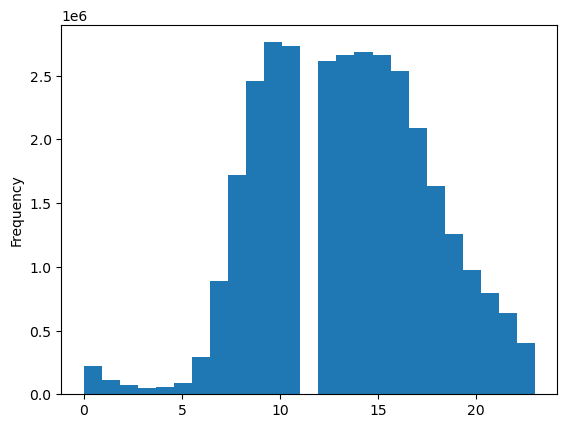

In [5]:
# Creating histograms of orders_hour_of_day

ords_prods_customer['order_hour_of_day'].plot.hist(bins=25)

In [6]:
# Counting orders be hour

ords_prods_customer['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

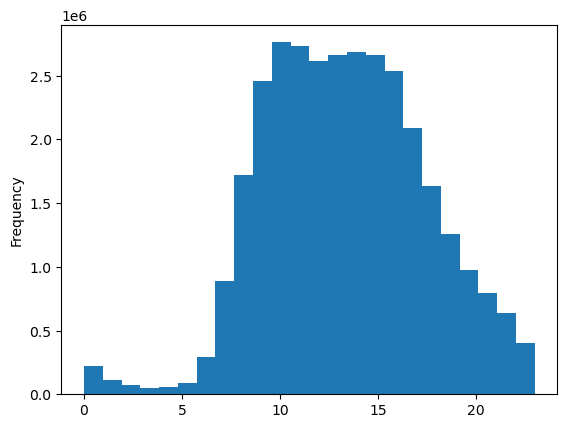

In [9]:
# Creating another histogram of orders_hour_of_day

ords_prods_customer['order_hour_of_day'].plot.hist(bins=24)

Notes: This histogram shows us that sales are lowest between 0:00 and 5:00. From there they increase sharply each hour between 6:00 and 10:00, at which point the most sales occur. Sales remain at a high rate until 17:00, at which point they decrease every hour. 

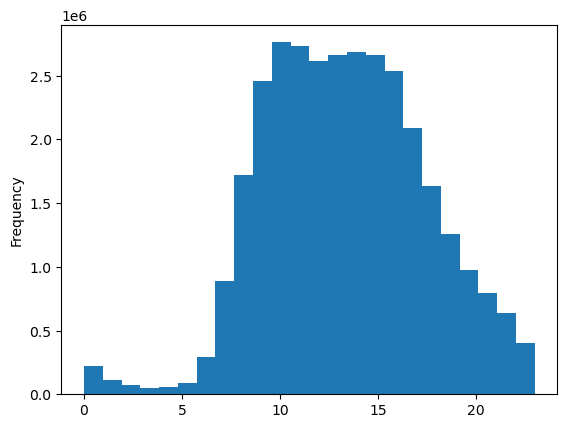

In [10]:
# Saving histogram in Jupyter history

hist_order_hour_of_day = ords_prods_customer['order_hour_of_day'].plot.hist(bins=24)

In [11]:
# Saving hisogram

hist_order_hour_of_day.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, hist_order_hour_of_day.png')

# 3. Orders by customer loyalty bar chart

<Axes: xlabel='loyalty_flag'>

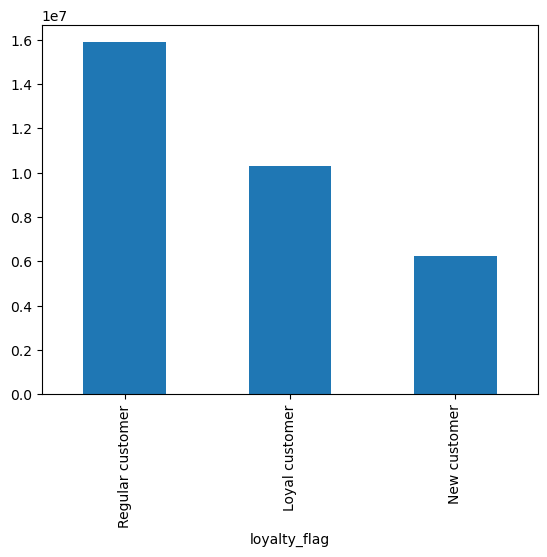

In [12]:
# Creating bar chart for orders by loyalty flag

ords_prods_customer['loyalty_flag'].value_counts().plot.bar()

In [13]:
# Counting values made as categorized by loyalty flag

ords_prods_customer['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

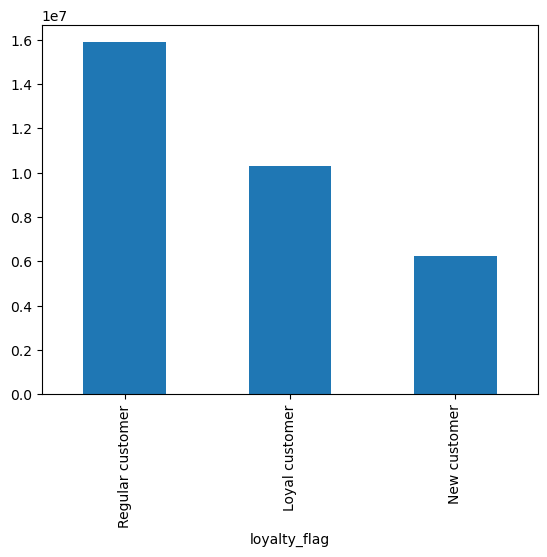

In [14]:
# Saving bar chart in Juypter history

bar_orders_loyalty_flag = ords_prods_customer['loyalty_flag'].value_counts().plot.bar()

In [15]:
# Saving bar chart

bar_orders_loyalty_flag.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, bar_orders_loyalty_flag.png')

# 4. Difference in expenditure (price) by hour of day line chart

In [16]:
# Assigning values to the rows for sampling, creating two lists holding True/False values depending on whether its larger than 0.7 or not

np.random.seed(4)
dev = np.random.rand(len(ords_prods_customer)) <= 0.7

In [17]:
# Looking at the output of the above

dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
# Splitting dataframe into two samples, storing 70% of the sample in the dataframe big

big_samp = ords_prods_customer[dev]

In [19]:
# Splitting dataframe into two samples, storing 30% of the sample in the dataframe small

small_samp = ords_prods_customer[~dev]

In [20]:
# Checking to make sure the split was correct
# Looking at the length of the entire dataset

len(ords_prods_customer)

32404859

In [21]:
# Looking at the length of the two split datasets added together

len(big_samp) + len(small_samp)

32404859

Note: since the sum of the two samples is the same as the length of the total dataset, we know that the split was successful. 

In [22]:
# Reducing the dataset to only include the columns needed for the linechart to compare price and hour the order was made

df_price_dif = small_samp[['order_hour_of_day','prices']]

In [23]:
# Checking the reduction

df_price_dif.head()

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


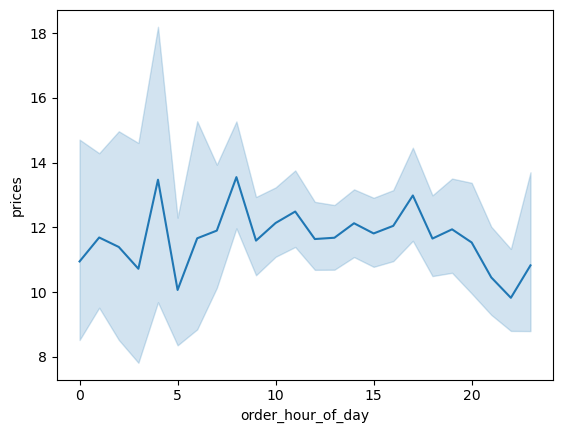

In [24]:
# Creating a linechart to compare prices and hour of day the order was made

line = sns.lineplot(data = df_price_dif, x = 'order_hour_of_day',y = 'prices')

In [25]:
# Counting values in sample subset

df_price_dif['order_hour_of_day'].value_counts()

order_hour_of_day
10    828928
11    820544
14    807693
15    798736
13    798575
12    785375
16    760655
9     736044
17    626445
8     515980
18    490029
19    377921
20    292537
7     267260
21    238423
22    189965
23    120415
6      87092
0      65259
1      34439
5      26785
2      20767
4      15879
3      15352
Name: count, dtype: int64

In [26]:
#Counting values in full set for comparison

ords_prods_customer['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

Notes: Given that the times of the day with the most orders are in the exact same order, we can conclude that the sample is representative of the whole. 

In [27]:
# Saving line chart

line.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, line_prices_hour.png')

# 5. Exploratory analysis of customer demographics

# 5a. Seeing if there is a connection between age and family situation

In [28]:
# Reducing dataset to include columns needed: age and number of dependents

df_age_dependents = small_samp[['age','dependents']]

In [29]:
# Checking

df_age_dependents.head()

,age,dependents
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zoey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


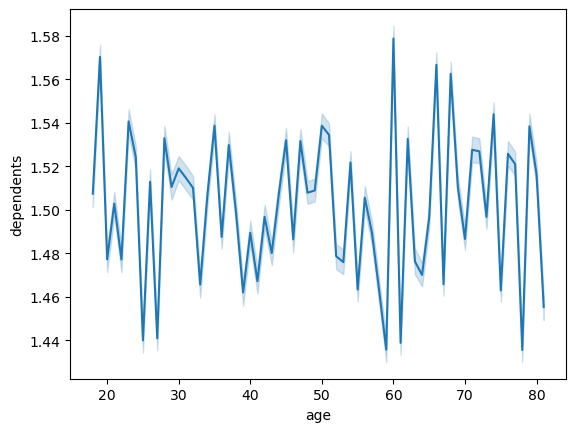

In [30]:
# Creating a linechart to explore connections between age and number of dependents

line_age_dependents = sns.lineplot(data = df_age_dependents, x = 'age',y = 'dependents')

In [31]:
# Counting number of dependents in small sample set

df_age_dependents['dependents'].value_counts()

dependents
3    2439470
2    2429348
0    2428833
1    2423447
Name: count, dtype: int64

In [32]:
# Counting number of dependents in full set

ords_prods_customer['dependents'].value_counts()

dependents
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

Notes: Based on the line chart, there does not seem to be a correlation between age and the number of dependents a customer has. 

Although the order of the number of dependents is different between the full set and the sample set, this is due to the fact that numbers are all quite close together/evenly split, with slightly more customers with 3 dependents in both datasets. 

In [33]:
# Saving line chart

line_age_dependents.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, line_age_dependents.png')

# 5b. Seeing if there is a connection between age and spending power (income)

In [34]:
# Reducing dataset to include columns needed: age and income

df_age_income = small_samp[['age','income']]

In [35]:
# Checking

df_age_income.head()

,age,income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


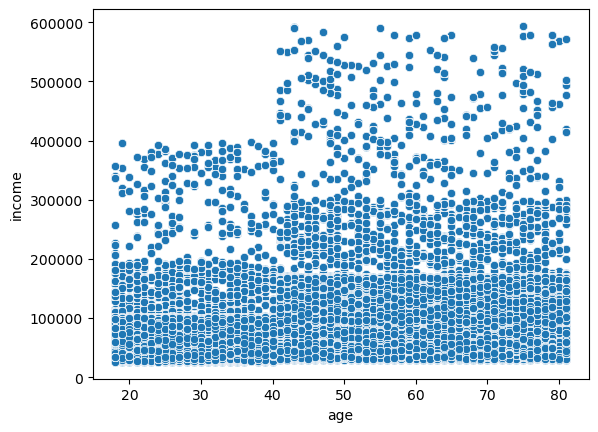

In [36]:
# Creating scatterplot to explore connections between age and income

scatter_age_income = sns.scatterplot(data = df_age_income, x = 'age',y = 'income')

Notes: From this scatterplot, we see that there is a jump in income around age 40. 

In [37]:
# Saving scatterplot

scatter_age_income.figure.savefig(r'/Users/zoey/Career Foundry Stuff/Instacart Basket Analysis - 14.12.2023/04 Analysis/Visualizations, scatter_age_income.png')